Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv('Dataset/diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    df[col].replace(0, np.NaN, inplace=True)
    
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB


In [8]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Outcome'].value_counts()

0    262
1    130
Name: Outcome, dtype: int64

In [10]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462


In [5]:
# separating into 2 dataframes, one for each class 

df0 = df[df['Outcome'] == 0]
df1 = df[df['Outcome'] == 1]

In [6]:
print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

# Upsampling 

df1 = df1.sample(len(df0), replace = True)    # replace = True enables resampling

print('\nAfter resampling - ')

print("Number of samples in:")
print("Class label 0 - ", len(df0))
print("Class label 1 - ", len(df1))

Number of samples in:
Class label 0 -  262
Class label 1 -  130

After resampling - 
Number of samples in:
Class label 0 -  262
Class label 1 -  262


In [7]:
df = pd.concat([df1, df0])

print('Total number of samples:', len(df))

Total number of samples: 524


In [8]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1).values
y = df['Outcome'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

Data Standardization

In [10]:
scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Test Split

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(524, 8) (419, 8) (105, 8)


Training the Model

In [29]:
classifier = svm.SVC(kernel='linear')

In [31]:
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [40]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7971360381861575


In [41]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8


In [13]:
import xgboost as xgb

In [14]:
# create the model
clf = xgb.XGBClassifier()

# fit the model to the training data
clf.fit(X_train, y_train)

# make predictions on the test data
y_pred = clf.predict(X_test)

# evaluate the model's performance
accuracy = (y_pred == y_test).mean()
print("Accuracy: ", accuracy)

Accuracy:  0.8952380952380953


In [15]:
# accuracy score on the training data
X_train_prediction = clf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [18]:
# accuracy score on the test data
X_test_prediction = clf.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8952380952380953


In [20]:
import pickle

filename = 'diabetes_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

In [21]:
model = pickle.load(open('diabetes_model.pkl', 'rb'))

In [27]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data = input_data.reshape(1,-1)

# standardize the input data
scaled_data = scaler.transform(input_data)
print(scaled_data)

prediction = model.predict(scaled_data)

print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.30697211  1.23087677  0.03876253 -1.05768448  0.10750533 -1.16336908
   0.06019614  1.80430949]]
[1]
The person is diabetic


In [47]:
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150]}

# create the model
clf = xgb.XGBClassifier()

# perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'max_depth': 5, 'n_estimators': 50}


In [51]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint

In [60]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_11 (Dense)            (None, 8)                

In [61]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer= opt ,loss='binary_crossentropy',metrics=['acc'])

In [62]:
checkpointer = ModelCheckpoint('diabetes.h5', monitor='val_acc', mode='max', verbose=2, save_best_only=True)
history=model.fit(X_train, y_train, batch_size=16, epochs=350, validation_data=(X_test, y_test), callbacks=[checkpointer])

Epoch 1/350
24/27 [=========================>....] - ETA: 0s - loss: 0.7067 - acc: 0.5234 
Epoch 1: val_acc improved from -inf to 0.50476, saving model to diabetes.h5
27/27 [==============================] - 1s 13ms/step - loss: 0.7083 - acc: 0.5298 - val_loss: 0.7061 - val_acc: 0.5048
Epoch 2/350
 1/27 [>.............................] - ETA: 0s - loss: 0.6953 - acc: 0.3750
Epoch 2: val_acc did not improve from 0.50476
27/27 [==============================] - 0s 3ms/step - loss: 0.7056 - acc: 0.4630 - val_loss: 0.7054 - val_acc: 0.4190
Epoch 3/350
 1/27 [>.............................] - ETA: 0s - loss: 0.7052 - acc: 0.4375
Epoch 3: val_acc did not improve from 0.50476
27/27 [==============================] - 0s 2ms/step - loss: 0.7008 - acc: 0.4749 - val_loss: 0.7049 - val_acc: 0.3333
Epoch 4/350
 1/27 [>.............................] - ETA: 0s - loss: 0.6982 - acc: 0.5625
Epoch 4: val_acc did not improve from 0.50476
27/27 [==============================] - 0s 3ms/step - loss: 0.7066

27/27 [==============================] - 0s 5ms/step - loss: 0.6949 - acc: 0.4940 - val_loss: 0.6919 - val_acc: 0.5429
Epoch 33/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6936 - acc: 0.4500
Epoch 33: val_acc did not improve from 0.54286
27/27 [==============================] - 0s 4ms/step - loss: 0.6936 - acc: 0.4535 - val_loss: 0.6918 - val_acc: 0.5429
Epoch 34/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6921 - acc: 0.5417
Epoch 34: val_acc did not improve from 0.54286
27/27 [==============================] - 0s 4ms/step - loss: 0.6927 - acc: 0.5322 - val_loss: 0.6916 - val_acc: 0.5333
Epoch 35/350
20/27 [=====================>........] - ETA: 0s - loss: 0.6953 - acc: 0.5063
Epoch 35: val_acc did not improve from 0.54286
27/27 [==============================] - 0s 5ms/step - loss: 0.6950 - acc: 0.4916 - val_loss: 0.6913 - val_acc: 0.5333
Epoch 36/350
20/27 [=====================>........] - ETA: 0s - loss: 0.6951 - acc: 0.5000
Epoch 36: val_acc d

Epoch 64/350
19/27 [====================>.........] - ETA: 0s - loss: 0.6921 - acc: 0.5461
Epoch 64: val_acc improved from 0.60952 to 0.62857, saving model to diabetes.h5
27/27 [==============================] - 0s 6ms/step - loss: 0.6914 - acc: 0.5394 - val_loss: 0.6869 - val_acc: 0.6286
Epoch 65/350
23/27 [========================>.....] - ETA: 0s - loss: 0.6957 - acc: 0.5136
Epoch 65: val_acc did not improve from 0.62857
27/27 [==============================] - 0s 4ms/step - loss: 0.6948 - acc: 0.5274 - val_loss: 0.6868 - val_acc: 0.6286
Epoch 66/350
 1/27 [>.............................] - ETA: 0s - loss: 0.6849 - acc: 0.6250
Epoch 66: val_acc did not improve from 0.62857
27/27 [==============================] - 0s 3ms/step - loss: 0.6915 - acc: 0.5227 - val_loss: 0.6866 - val_acc: 0.6286
Epoch 67/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6898 - acc: 0.5288
Epoch 67: val_acc did not improve from 0.62857
27/27 [==============================] - 0s 3ms/step - los

23/27 [========================>.....] - ETA: 0s - loss: 0.6800 - acc: 0.6005
Epoch 126: val_acc did not improve from 0.71429
27/27 [==============================] - 0s 4ms/step - loss: 0.6798 - acc: 0.5943 - val_loss: 0.6707 - val_acc: 0.7143
Epoch 127/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6817 - acc: 0.5990
Epoch 127: val_acc did not improve from 0.71429
27/27 [==============================] - 0s 4ms/step - loss: 0.6805 - acc: 0.6014 - val_loss: 0.6700 - val_acc: 0.7143
Epoch 128/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6864 - acc: 0.5651
Epoch 128: val_acc did not improve from 0.71429
27/27 [==============================] - 0s 4ms/step - loss: 0.6857 - acc: 0.5704 - val_loss: 0.6696 - val_acc: 0.7143
Epoch 129/350
21/27 [======================>.......] - ETA: 0s - loss: 0.6789 - acc: 0.6190
Epoch 129: val_acc did not improve from 0.71429
27/27 [==============================] - 0s 4ms/step - loss: 0.6799 - acc: 0.6158 - val_loss: 0.6

Epoch 157/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6708 - acc: 0.6200
Epoch 157: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 3ms/step - loss: 0.6722 - acc: 0.6205 - val_loss: 0.6520 - val_acc: 0.8000
Epoch 158/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6618 - acc: 0.6380
Epoch 158: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 3ms/step - loss: 0.6626 - acc: 0.6325 - val_loss: 0.6510 - val_acc: 0.8095
Epoch 159/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6746 - acc: 0.6154
Epoch 159: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6753 - acc: 0.6110 - val_loss: 0.6502 - val_acc: 0.8095
Epoch 160/350
24/27 [=========================>....] - ETA: 0s - loss: 0.6711 - acc: 0.6198
Epoch 160: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6699 - acc: 0.6325 -

Epoch 189/350
20/27 [=====================>........] - ETA: 0s - loss: 0.6564 - acc: 0.6281
Epoch 189: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 5ms/step - loss: 0.6606 - acc: 0.6301 - val_loss: 0.6210 - val_acc: 0.7905
Epoch 190/350
18/27 [===================>..........] - ETA: 0s - loss: 0.6514 - acc: 0.6215
Epoch 190: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6473 - acc: 0.6325 - val_loss: 0.6200 - val_acc: 0.7905
Epoch 191/350
19/27 [====================>.........] - ETA: 0s - loss: 0.6510 - acc: 0.6316
Epoch 191: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 5ms/step - loss: 0.6573 - acc: 0.6253 - val_loss: 0.6185 - val_acc: 0.7905
Epoch 192/350
21/27 [======================>.......] - ETA: 0s - loss: 0.6579 - acc: 0.6071
Epoch 192: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6549 - acc: 0.6134 -

Epoch 221/350
19/27 [====================>.........] - ETA: 0s - loss: 0.6281 - acc: 0.6842
Epoch 221: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6293 - acc: 0.6659 - val_loss: 0.5857 - val_acc: 0.7810
Epoch 222/350
18/27 [===================>..........] - ETA: 0s - loss: 0.6372 - acc: 0.6840
Epoch 222: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6407 - acc: 0.6706 - val_loss: 0.5844 - val_acc: 0.7810
Epoch 223/350
23/27 [========================>.....] - ETA: 0s - loss: 0.6496 - acc: 0.6549
Epoch 223: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6426 - acc: 0.6563 - val_loss: 0.5843 - val_acc: 0.7810
Epoch 224/350
19/27 [====================>.........] - ETA: 0s - loss: 0.6386 - acc: 0.6480
Epoch 224: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6344 - acc: 0.6659 -

Epoch 253/350
20/27 [=====================>........] - ETA: 0s - loss: 0.6150 - acc: 0.6719
Epoch 253: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 5ms/step - loss: 0.6152 - acc: 0.6659 - val_loss: 0.5617 - val_acc: 0.7810
Epoch 254/350
22/27 [=======================>......] - ETA: 0s - loss: 0.6122 - acc: 0.6591
Epoch 254: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6122 - acc: 0.6516 - val_loss: 0.5618 - val_acc: 0.7810
Epoch 255/350
21/27 [======================>.......] - ETA: 0s - loss: 0.5815 - acc: 0.7143
Epoch 255: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6089 - acc: 0.6897 - val_loss: 0.5610 - val_acc: 0.7810
Epoch 256/350
26/27 [===========================>..] - ETA: 0s - loss: 0.6181 - acc: 0.6995
Epoch 256: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 3ms/step - loss: 0.6177 - acc: 0.7017 -

Epoch 285/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6011 - acc: 0.6675
Epoch 285: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6013 - acc: 0.6706 - val_loss: 0.5470 - val_acc: 0.7714
Epoch 286/350
25/27 [==========================>...] - ETA: 0s - loss: 0.5836 - acc: 0.7075
Epoch 286: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 3ms/step - loss: 0.6010 - acc: 0.7017 - val_loss: 0.5464 - val_acc: 0.7714
Epoch 287/350
21/27 [======================>.......] - ETA: 0s - loss: 0.6210 - acc: 0.6518
Epoch 287: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6166 - acc: 0.6611 - val_loss: 0.5473 - val_acc: 0.7714
Epoch 288/350
25/27 [==========================>...] - ETA: 0s - loss: 0.6194 - acc: 0.6500
Epoch 288: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6419 - acc: 0.6372 -

Epoch 317/350
21/27 [======================>.......] - ETA: 0s - loss: 0.6191 - acc: 0.6935
Epoch 317: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6141 - acc: 0.6897 - val_loss: 0.5355 - val_acc: 0.7905
Epoch 318/350
22/27 [=======================>......] - ETA: 0s - loss: 0.5621 - acc: 0.7045
Epoch 318: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.5626 - acc: 0.7064 - val_loss: 0.5350 - val_acc: 0.7905
Epoch 319/350
22/27 [=======================>......] - ETA: 0s - loss: 0.6010 - acc: 0.7102
Epoch 319: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.5994 - acc: 0.7112 - val_loss: 0.5352 - val_acc: 0.7905
Epoch 320/350
21/27 [======================>.......] - ETA: 0s - loss: 0.6399 - acc: 0.6696
Epoch 320: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.6357 - acc: 0.6683 -

Epoch 349/350
19/27 [====================>.........] - ETA: 0s - loss: 0.5982 - acc: 0.6875
Epoch 349: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 5ms/step - loss: 0.6034 - acc: 0.6993 - val_loss: 0.5277 - val_acc: 0.8000
Epoch 350/350
21/27 [======================>.......] - ETA: 0s - loss: 0.5960 - acc: 0.6786
Epoch 350: val_acc did not improve from 0.80952
27/27 [==============================] - 0s 4ms/step - loss: 0.5795 - acc: 0.7017 - val_loss: 0.5272 - val_acc: 0.8000


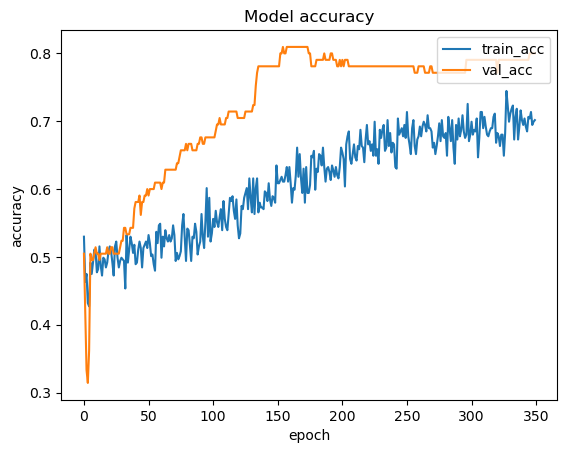

In [64]:
import matplotlib.pyplot as plt

# plot the training artifacts
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc','val_acc'], loc = 'upper right')
plt.show()

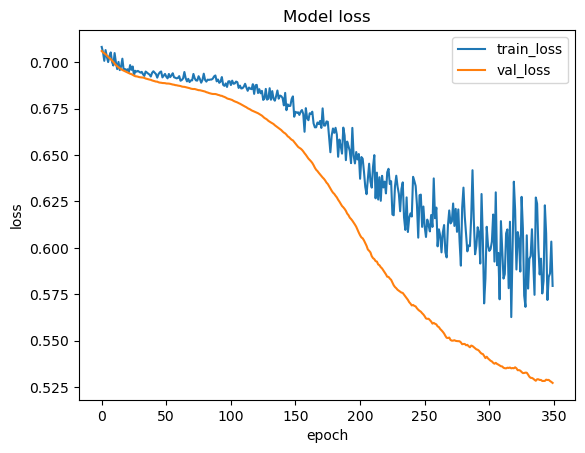

In [65]:
# plot the training artifacts

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [67]:
present_model = keras.models.load_model('diabetes.h5')

In [68]:
# predicting on test data.
pred_test = present_model.predict(X_test)
for i in range (len(pred_test)):
    if (pred_test[i] < 0.5):
        pred_test[i] = 0
    else:
        pred_test[i] = 1
pred_test = pred_test.astype(int)

4/4 [==============================] - 0s 4ms/step


In [69]:
def view_result(array):
    array = np.array(array)
    for i in range(len(array)):
        if array[i] == 0:
            print("Not Diabetic")
        else:
            print("Diabetic")

In [70]:
view_result(pred_test[:10])


Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Diabetic


In [71]:
view_result(y_test[:10])


Diabetic
Diabetic
Diabetic
Diabetic
Diabetic
Not Diabetic
Diabetic
Diabetic
Diabetic
Diabetic


Making a Predictive System

In [66]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.42900537  1.17528896  0.0282555  -1.05533313  0.04781268 -1.1292751
   0.08427001  1.77880371]]
[1]
The person is diabetic
